#1 часть

##Настройка трансформации изображений с помощью ImageDataGenerator
Мы увеличим наш набор данных через трансформацию существующих изображений:
* rotation_range - случайный поворот изображения в указанном диапазоне (0-180);
* width_shift_range/height_shift_range -  смещение изображения по ширине/высоте;
* shear_range - случайное применение сдвигового преобразования;
* zoom_range -  увеличение/уменьшение размера изображения;
* horizontal_flip - случайный поворот изображения вдоль горизонтали.

Стратегия заполнения пикселей после поворота или смещения по умолчанию определяется параметром fill_mode = 'nearest'.
Полный список вариантов возможных трансформаций изображений представлена в документации к библиотеке Keras.

Генерация новых изображений выполняется с помощью класса ImageDataGenerator библиотеки Keras. Загрузим его из модуля c утилитами для обработки изображений: keras.preprocessing.image.

Запишем настройки трансформации изображений с помощью ImageDataGenerator в каталог datagen.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        zoom_range=0.05,
        horizontal_flip=True,
        fill_mode='nearest')

##Загрузка изображений с Google-диска

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# скопируем датасеты с Google диска в Colab
!cp '/content/drive/MyDrive/colab_datasests/Parasitized.zip' Parasitized.zip
!cp '/content/drive/MyDrive/colab_datasests/Uninfected.zip' Uninfected.zip

In [ ]:
!ls

drive  Parasitized.zip	sample_data  Uninfected.zip


##Подготовка исходных изображений

In [ ]:
# распаковка архива
!unzip Parasitized.zip
!unzip Uninfected.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
 extracting: Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
 extracting: Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
 extracting: Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
 extracting: Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
 extracting: Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
 extracting: Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
 extracting: Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
 extracting: Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
 extracting: Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
 extracting: Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
 extracting: Uninfected/C236ThinF_IMG_20151127_102428_cell_91.png  
 extracting: Uninfected/C236ThinF_IMG_20151127_102516_cell_104.png  
 extracting: Uninfected/C236ThinF_IMG_20151127_102516_cell_13.png  
 extracting: Uninfected/C236ThinF_IMG_

Запишем список извлеченных файлов из архивов "Parasitized" и "Uninfected" в переменные для их последующего использования. Для этого используем модуль os и метод listdir.

In [ ]:
# запишем список файлов  директорий в соответствующие переменные
import os
Parasitized = os.listdir('/content/Parasitized')
Uninfected = os.listdir('/content/Uninfected')

In [ ]:
print(Parasitized)
print(Uninfected)

['C84P45ThinF_IMG_20150818_103817_cell_6.png', 'C127P88ThinF_IMG_20151004_112301_cell_123.png', 'C137P98ThinF_IMG_20151005_163251_cell_60.png', 'C67P28N_ThinF_IMG_20150819_121053_cell_231.png', 'C182P143NThinF_IMG_20151201_172759_cell_13.png', 'C183P144NThinF_IMG_20151201_222917_cell_144.png', 'C128P89ThinF_IMG_20151004_131231_cell_149.png', 'C182P143NThinF_IMG_20151201_172607_cell_34.png', 'C172P133ThinF_IMG_20151119_155343_cell_287.png', 'C101P62ThinF_IMG_20150918_151942_cell_80.png', 'C70P31_ThinF_IMG_20150819_141403_cell_95.png', 'C119P80ThinF_IMG_20151002_124425_cell_142.png', 'C184P145ThinF_IMG_20151203_102543_cell_148.png', 'C114P75ThinF_IMG_20150930_151150_cell_179.png', 'C85P46ThinF_IMG_20150820_110040_cell_235.png', 'C129P90ThinF_IMG_20151004_134700_cell_27.png', 'C180P141NThinF_IMG_20151201_165659_cell_1.png', 'C80P41ThinF_IMG_20150817_110348_cell_126.png', 'C136P97ThinF_IMG_20151005_143329_cell_103.png', 'C91P52ThinF_IMG_20150821_124311_cell_6.png', 'C99P60ThinF_IMG_2015091

Создадим директорию "Data", в которую будем сохранять аугментированные данные. Для этого используем команду mkdir.

In [ ]:
!mkdir Data

In [ ]:
!ls

Data   Parasitized	sample_data  Uninfected.zip
drive  Parasitized.zip	Uninfected


##Генерация новых изображений

In [ ]:
from tensorflow.keras.utils import img_to_array
# функция для генерации изображений
def generating_pictures(img, prefix):
  x = img_to_array(img)  # это массив Numpy с формой (канал цвета, высота, ширина)
  x = x.reshape((1,) + x.shape)  # изменение формы массива (количество изображений, канал цвета, высота, ширина)
  i = 0 # счетчик изображений
  for batch in datagen.flow(x,
                            batch_size = 1,
                            save_to_dir = '/content/Data/',
                            save_prefix = prefix,
                            save_format='jpeg'):
      i += 1
      if i > 20:
          break  # выход из цикла при i > 20

Создадим словарь Python для формирования аргументов функции generating_pictures - img и prefix. Ключу будет соответствовать путь к изображению, значению - соответствующий префикс для сгенерированного файла.

In [ ]:
# Parasitized
path_Parasitized = []
for name in Parasitized:
  path = '/content/Parasitized/' + name
  path_Parasitized.append(path)

In [ ]:
# Uninfected
path_Uninfected = []
for name in Uninfected:
  path = '/content/Uninfected/' + name
  path_Uninfected.append(path)

Посмотрим на результат

In [ ]:
path_Parasitized

['/content/Parasitized/C84P45ThinF_IMG_20150818_103817_cell_6.png',
 '/content/Parasitized/C127P88ThinF_IMG_20151004_112301_cell_123.png',
 '/content/Parasitized/C137P98ThinF_IMG_20151005_163251_cell_60.png',
 '/content/Parasitized/C67P28N_ThinF_IMG_20150819_121053_cell_231.png',
 '/content/Parasitized/C182P143NThinF_IMG_20151201_172759_cell_13.png',
 '/content/Parasitized/C183P144NThinF_IMG_20151201_222917_cell_144.png',
 '/content/Parasitized/C128P89ThinF_IMG_20151004_131231_cell_149.png',
 '/content/Parasitized/C182P143NThinF_IMG_20151201_172607_cell_34.png',
 '/content/Parasitized/C172P133ThinF_IMG_20151119_155343_cell_287.png',
 '/content/Parasitized/C101P62ThinF_IMG_20150918_151942_cell_80.png',
 '/content/Parasitized/C70P31_ThinF_IMG_20150819_141403_cell_95.png',
 '/content/Parasitized/C119P80ThinF_IMG_20151002_124425_cell_142.png',
 '/content/Parasitized/C184P145ThinF_IMG_20151203_102543_cell_148.png',
 '/content/Parasitized/C114P75ThinF_IMG_20150930_151150_cell_179.png',
 '/co

In [ ]:
path_Uninfected

['/content/Uninfected/C234ThinF_IMG_20151112_162909_cell_274.png',
 '/content/Uninfected/C114P75ThinF_IMG_20150930_150733_cell_116.png',
 '/content/Uninfected/C104P65ThinF_IMG_20150918_170850_cell_174.png',
 '/content/Uninfected/C139P100ThinF_IMG_20151005_182257_cell_177.png',
 '/content/Uninfected/C216ThinF_IMG_20151106_135337_cell_145.png',
 '/content/Uninfected/C54P15thinF_IMG_20150728_105949_cell_226.png',
 '/content/Uninfected/C6NThinF_IMG_20150609_122327_cell_20.png',
 '/content/Uninfected/C65P26N_ThinF_IMG_20150818_154714_cell_110.png',
 '/content/Uninfected/C206ThinF_IMG_20151029_140538_cell_195.png',
 '/content/Uninfected/C169P130ThinF_IMG_20151118_173039_cell_1.png',
 '/content/Uninfected/C127P88ThinF_IMG_20151004_111220_cell_65.png',
 '/content/Uninfected/C181P142ThinF_IMG_20151127_155914_cell_30.png',
 '/content/Uninfected/C172P133ThinF_IMG_20151119_155156_cell_113.png',
 '/content/Uninfected/C214ThinF_IMG_20151106_115440_cell_58.png',
 '/content/Uninfected/C219ThinF_IMG_20

Создадим префиксы для сгенерированных файлов - 'Parasitized' и 'Uninfected', соответственно для файлов с изображением листьев березы и листьев подорожника.

In [ ]:
# создание префикса для новых файлов
prefix_Parasitized = 'Parasitized'
prefix_Uninfected = 'Uninfected'

Создадим словарь Python для каждого класса изображений с аргументами для функции generating_pictures, используя метод fromkeys. В словаре для каждого класса ключ - путь к имени файла - это аргумент img, значение - соответствующий префикс для нового файла - это аргумент prefix.

In [ ]:
# создание словаря с аргументами для функции generating_pictures
dict_Parasitized = dict.fromkeys(path_Parasitized, prefix_Parasitized)
dict_Uninfected = dict.fromkeys(path_Uninfected, prefix_Uninfected)

In [ ]:
dict_Parasitized = dict(list(dict_Parasitized.items())[::10])
dict_Uninfected = dict(list(dict_Uninfected.items())[::10])

Далее в цикле присвоим аргументам img и prefix ключ и значение из соответствующего словаря и вызовем функцию для генерации новых изображений. Для загрузки изображений используем функцию load_img.

In [ ]:
from tensorflow.keras.utils import load_img
# определение аргументов для файлов Parasitized
for key, value in dict_Parasitized.items():
  img = load_img(key)  # путь к имени файла
  prefix = value # префикс для нового файла
  # вызов функции
  generating_pictures(img, prefix)

In [ ]:
# определение аргументов для файлов Uninfected
for key, value in dict_Uninfected.items():
  img = load_img(key)  # путь к имени файла
  prefix = value # префикс для нового файла
  # вызов функции
  generating_pictures(img, prefix)

In [ ]:
print(os.listdir('/content/Data'))

['Parasitized_0_4108.jpeg', 'Parasitized_0_606.jpeg', 'Uninfected_0_821.jpeg', 'Parasitized_0_8285.jpeg', 'Parasitized_0_6194.jpeg', 'Parasitized_0_1242.jpeg', 'Uninfected_0_1832.jpeg', 'Uninfected_0_324.jpeg', 'Uninfected_0_3096.jpeg', 'Uninfected_0_2500.jpeg', 'Uninfected_0_4256.jpeg', 'Uninfected_0_8853.jpeg', 'Uninfected_0_3937.jpeg', 'Parasitized_0_6281.jpeg', 'Parasitized_0_5038.jpeg', 'Parasitized_0_2141.jpeg', 'Uninfected_0_8381.jpeg', 'Parasitized_0_3946.jpeg', 'Uninfected_0_3786.jpeg', 'Parasitized_0_6857.jpeg', 'Parasitized_0_9505.jpeg', 'Uninfected_0_9338.jpeg', 'Parasitized_0_7491.jpeg', 'Uninfected_0_8375.jpeg', 'Parasitized_0_9246.jpeg', 'Uninfected_0_2384.jpeg', 'Parasitized_0_8214.jpeg', 'Parasitized_0_4487.jpeg', 'Uninfected_0_4300.jpeg', 'Parasitized_0_9615.jpeg', 'Parasitized_0_1489.jpeg', 'Parasitized_0_4371.jpeg', 'Uninfected_0_8262.jpeg', 'Parasitized_0_3527.jpeg', 'Parasitized_0_324.jpeg', 'Parasitized_0_6501.jpeg', 'Uninfected_0_6527.jpeg', 'Parasitized_0_4059.

In [ ]:
# подсчет файлов в директории
!find /content/Data -type f| wc -l

18863


##Просмотр новых изображений

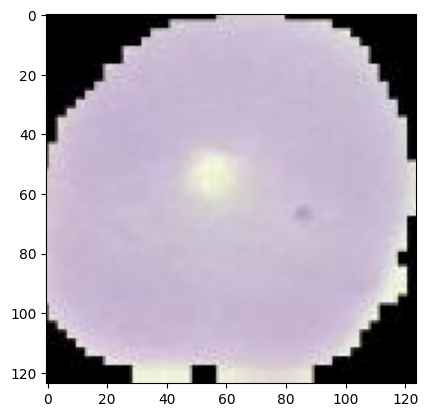

In [ ]:
# загрузим необходимые ресурсы
import matplotlib.pyplot as plt
import random
# поместим список новых файлов в переменную filenames
filenames = os.listdir('/content/Data')
# выберем случайный файл
sample = random.choice(filenames)
image = load_img("/content/Data/" + sample)
# посмотрим на изображение
plt.imshow(image)

##Упаковка архива с новыми данными

Упакуем директорию Data с новыми файлами в архив zip с именем archive_aug_Data.

In [ ]:
# создание архива zip (сжатие от 1 до 9)
!zip -r -9 archive_aug_Data /content/Data/*

Выходные данные были обрезаны до нескольких последних строк (5000).
  adding: content/Data/Uninfected_0_5235.jpeg (deflated 6%)
  adding: content/Data/Uninfected_0_5236.jpeg (deflated 6%)
  adding: content/Data/Uninfected_0_5237.jpeg (deflated 6%)
  adding: content/Data/Uninfected_0_5238.jpeg (deflated 6%)
  adding: content/Data/Uninfected_0_5239.jpeg (deflated 5%)
  adding: content/Data/Uninfected_0_523.jpeg (deflated 5%)
  adding: content/Data/Uninfected_0_5240.jpeg (deflated 6%)
  adding: content/Data/Uninfected_0_5241.jpeg (deflated 6%)
  adding: content/Data/Uninfected_0_5242.jpeg (deflated 6%)
  adding: content/Data/Uninfected_0_5243.jpeg (deflated 5%)
  adding: content/Data/Uninfected_0_5244.jpeg (deflated 7%)
  adding: content/Data/Uninfected_0_5245.jpeg (deflated 6%)
  adding: content/Data/Uninfected_0_5246.jpeg (deflated 6%)
  adding: content/Data/Uninfected_0_5247.jpeg (deflated 6%)
  adding: content/Data/Uninfected_0_5248.jpeg (deflated 6%)
  adding: content/Data/Uninfected

In [ ]:
!ls

archive_aug_Data.zip  drive	   Parasitized.zip  Uninfected
Data		      Parasitized  sample_data	    Uninfected.zip


In [ ]:
# копируем архив archive_aug_Data.zip на  Google-диск
!cp '/content/archive_aug_Data.zip' '/content/drive/MyDrive/colab_datasests'

#2 Часть. Классификация изображений

Итак, мы создали набор данных для обучения нейронной сети на основе аугментации исходных изображений. Новые изображения находятся в директории Data, для этой директории нами был создан список файлов filenames, который мы будем далее использовать. В нашем случае новый датасет Data содержит 619 изображений.

Также мы создали архив из директории Data - archive_aug_Data.zip, который сохранили  на Google-диске, чтобы использовать его в будущем для обучения нейронной сети.

#Загрузка датасета

****!!! Этот раздел выполнять в случае загрузки архива с данными archive_aug_Data.zip с вашего Google-диска !!!****

In [ ]:
# подключение Google-диска
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# копирование архива archive_aug_Data.zip с данными в Colaboratory с Google-диска
!cp '/content/drive/MyDrive/colab_datasests/archive_aug_Data.zip' archive_aug_Data.zip

In [ ]:
# проверим наличие файла
!ls

archive_aug_Data.zip  drive	   Parasitized.zip  Uninfected
Data		      Parasitized  sample_data	    Uninfected.zip


In [ ]:
# распакуем архив
!unzip archive_aug_Data.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: content/Data/Uninfected_0_5235.jpeg  
  inflating: content/Data/Uninfected_0_5236.jpeg  
  inflating: content/Data/Uninfected_0_5237.jpeg  
  inflating: content/Data/Uninfected_0_5238.jpeg  
  inflating: content/Data/Uninfected_0_5239.jpeg  
  inflating: content/Data/Uninfected_0_523.jpeg  
  inflating: content/Data/Uninfected_0_5240.jpeg  
  inflating: content/Data/Uninfected_0_5241.jpeg  
  inflating: content/Data/Uninfected_0_5242.jpeg  
  inflating: content/Data/Uninfected_0_5243.jpeg  
  inflating: content/Data/Uninfected_0_5244.jpeg  
  inflating: content/Data/Uninfected_0_5245.jpeg  
  inflating: content/Data/Uninfected_0_5246.jpeg  
  inflating: content/Data/Uninfected_0_5247.jpeg  
  inflating: content/Data/Uninfected_0_5248.jpeg  
  inflating: content/Data/Uninfected_0_5249.jpeg  
  inflating: content/Data/Uninfected_0_524.jpeg  
  inflating: content/Data/Uninfected_0_5250.jpeg  
  inflating: con

In [ ]:
# импортируем модуль os для работы с файловой системой
import os
# создадим список файлов распакованной директории Data
filenames = os.listdir('/content/content/Data')

In [ ]:
# посмотрим на список файлов
filenames

['Parasitized_0_4108.jpeg',
 'Parasitized_0_606.jpeg',
 'Uninfected_0_821.jpeg',
 'Parasitized_0_8285.jpeg',
 'Parasitized_0_6194.jpeg',
 'Parasitized_0_1242.jpeg',
 'Uninfected_0_1832.jpeg',
 'Uninfected_0_324.jpeg',
 'Uninfected_0_3096.jpeg',
 'Uninfected_0_2500.jpeg',
 'Uninfected_0_4256.jpeg',
 'Uninfected_0_8853.jpeg',
 'Uninfected_0_3937.jpeg',
 'Parasitized_0_6281.jpeg',
 'Parasitized_0_5038.jpeg',
 'Parasitized_0_2141.jpeg',
 'Uninfected_0_8381.jpeg',
 'Parasitized_0_3946.jpeg',
 'Uninfected_0_3786.jpeg',
 'Parasitized_0_6857.jpeg',
 'Parasitized_0_9505.jpeg',
 'Uninfected_0_9338.jpeg',
 'Parasitized_0_7491.jpeg',
 'Uninfected_0_8375.jpeg',
 'Parasitized_0_9246.jpeg',
 'Uninfected_0_2384.jpeg',
 'Parasitized_0_8214.jpeg',
 'Parasitized_0_4487.jpeg',
 'Uninfected_0_4300.jpeg',
 'Parasitized_0_9615.jpeg',
 'Parasitized_0_1489.jpeg',
 'Parasitized_0_4371.jpeg',
 'Uninfected_0_8262.jpeg',
 'Parasitized_0_3527.jpeg',
 'Parasitized_0_324.jpeg',
 'Parasitized_0_6501.jpeg',
 'Uninfecte

#Подготовка данных для нейронной сети



##Разметка

Для реализации разметки файлов, используем его имя файла - если в имени файла есть слово "Parasitized", то поставим ему в соответствие метку 0, иначе - метку 1.

Для поиска в имени файла соответствующего слова используем метод split. Имя файла представляет собой строку, состоящую из имени и расширения, разделенные точкой. Методом split мы разбиваем строку на части, используя разделитель точку. Имя файла в строке имеет индекс [0]. Соотвественно, применим метод  split к каждому имени файла, используя цикл. Метки для каждого файла будем записывать в список categories, используя метод append().

Данные с именами файлов (filename) и их меток (category) определим в таблицу (датафрейм) с именем df, которую создадим при помощи библиотеки Pandas.  Pandas - это библиотека на языке Python, которая служит для анализа и обработки данных.




In [ ]:
import pandas as pd
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if 'Parasitized' in category:
        categories.append(0)
    else:
        categories.append(1)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

Посмотрим на первые 5 записей созданного датафрейма df, используя команду head().

In [ ]:
# head() по умолчанию возвращает первые 5 записей
df.head()

filename  category
0  Parasitized_0_4108.jpeg         0
1   Parasitized_0_606.jpeg         0
2    Uninfected_0_821.jpeg         1
3  Parasitized_0_8285.jpeg         0
4  Parasitized_0_6194.jpeg         0

In [ ]:
# общая информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18863 entries, 0 to 18862
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  18863 non-null  object
 1   category  18863 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 294.9+ KB


Можем посчитать количество меток, равных 1, используя функцию sum().  

In [ ]:
# сумма значений в столбце 'category' по строкам (axis=0)
df['category'].sum(axis = 0)

9443

<Axes: >

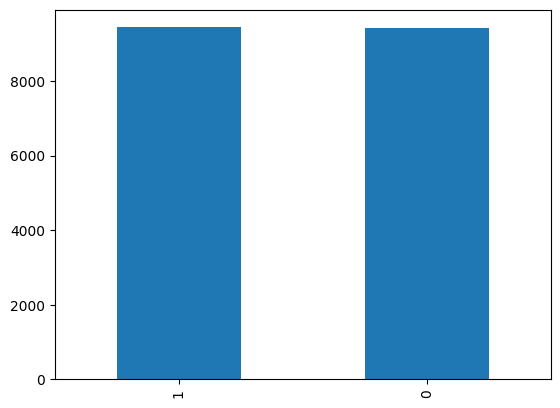

In [ ]:
import matplotlib.pyplot as plt
df['category'].value_counts().plot.bar()

Видим, что мы имеем сбалансированный датасет с равным количеством данных по классам - для изображений Uninfected - 1, для Parasitized - 0. Это особенно важно для небольшого датасета, как в нашем случае, чтобы нейронная сеть равномерно обучилась на всех данных.

In [ ]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

#Построение модели нейронной сети

In [ ]:
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from keras.layers.normalization.batch_normalization import BatchNormalization
from tensorflow.python.keras import Sequential

In [ ]:
model = Sequential()

# Conv2D - для создания сверточных слоев
model.add(Conv2D(32,
                 (3, 3),
                 activation='relu',
                 input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization()) # для создания слоя пакетной нормализации, как метода ускорения и повышения стабильности нейронных сетей
model.add(MaxPooling2D(pool_size=(2, 2))) # уменьшить количество данных, которые нужно обрабатывать, сохраняя при этом важные признаки.
model.add(Dropout(0.25)) # метод регуляризации, который позволяет случайным образом исключить некоторые нейроны из обучения с указанной вероятностью

model.add(Conv2D(64,
                 (3, 3),
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,
                 (3, 3),
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) # для создания переходного слоя от Conv2D к Dense
model.add(Dense(512,
                activation='relu')) # для создания полносвязных слоев
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,
                activation='softmax')) # 2 classes

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

#Подготовка обучающей и проверочной выборок

Мы используем ImageDataGenerator и метод flow_from_dataframe, чтобы подавать данные в нейронную сеть во время ее обучения. Параметр class_mode='categorical' отвечает за класс каждого изображения, который нужно научить предсказывать нейронную сеть.
При использовании этого аргумента, все значения в столбце датафрейма 'category' должны иметь строковый тип, поэтому выполним замену меток со значением 0 на 'Parasitized', а 1 - на 'Uninfected', используя метод replace.

In [ ]:
df['category'] = df['category'].replace({0: 'Parasitized', 1: 'Uninfected'})

In [ ]:
from sklearn.model_selection import train_test_split
# Создание обучающей и проверочной выборок
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=21)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

Посмотрим на распределение изображений в обучающей выборке train_df.

<Axes: >

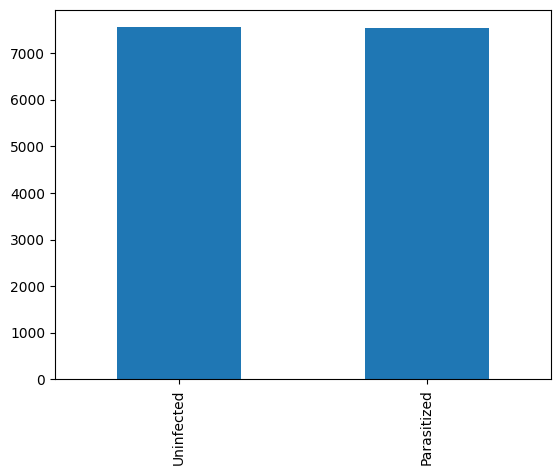

In [ ]:
train_df['category'].value_counts().plot.bar()

Посмотрим на распределение изображений в проверочной выборке validate_df.

<Axes: >

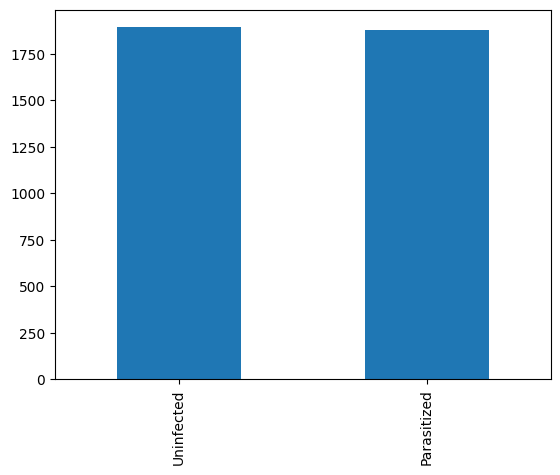

In [ ]:
validate_df['category'].value_counts().plot.bar()

In [ ]:
# обучающие и проверочные данные
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
# batch_size
batch_size=250

In [ ]:
print("Количество данных для обучения:", total_train)
print("Количество данных для оценки точности модели нейронной сети во время обучения:", total_validate)

Количество данных для обучения: 15090
Количество данных для оценки точности модели нейронной сети во время обучения: 3773


#Callbacks


- EarlyStopping - чтобы остановить процесс обучение, если точность обучения на проверочной выборке не будет улучшаться в течение 5 эпох обучения (patience=5);
- ReduceLROnPlateau - чтобы регулировать скорость обучения, если точность обучения  на проверочной выборке не будет улучшаться в течение 2 эпох обучения (patience=2);

In [ ]:
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
earlystop = EarlyStopping(patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=2,
                                            factor=0.5,
                                            min_lr=0.00001)

Сохраним обозначенные обратные вызовы в список callbacks, чтобы впоследствии передать их как аргумент метода fit для обучения модели.

In [ ]:
callbacks = [earlystop, learning_rate_reduction]

#ImageDataGenerator для обучающих и проверочных данных

пиксели исходных изображений необходимо преобразовать из диапазона [0, 255] в диапазон [0, 1]. Это называется нормализацией входных данных и выполняется с помощью параметра для масштабирования значений пикселей изображения rescale=1./255.

Также применим небольшие случайные преобразования к изображениям, что позволит нам расширить данные во время обучения за счет того, модель не увидит одно и то же изображение дважды. Этот прием позволяет создать дополнительные обучающие данные из имеющихся изображений путем их трансформации.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    shear_range=0.01,
    zoom_range=0.02,
    horizontal_flip=True,
    width_shift_range=0.01,
    height_shift_range=0.01
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "/content/content/Data/", # или "/content/Data/"
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 15090 validated image filenames belonging to 2 classes.


Аналогичные действия выполним для проверочной выборки.

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    shear_range=0.01,
    zoom_range=0.02,
    horizontal_flip=True,
    width_shift_range=0.01,
    height_shift_range=0.01
)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "/content/content/Data/", # или "/content/Data/"
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 3773 validated image filenames belonging to 2 classes.


Посмотрим как работает ImageDataGenerator на обучающей выборке. Выберем для этого три изображения и визуализируем их с помощью инструментов библиотеки matplotlib.

In [ ]:
example_df = train_df.sample(n=3).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "/content/content/Data/", # или "/content/Data/"
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 3 validated image filenames belonging to 2 classes.


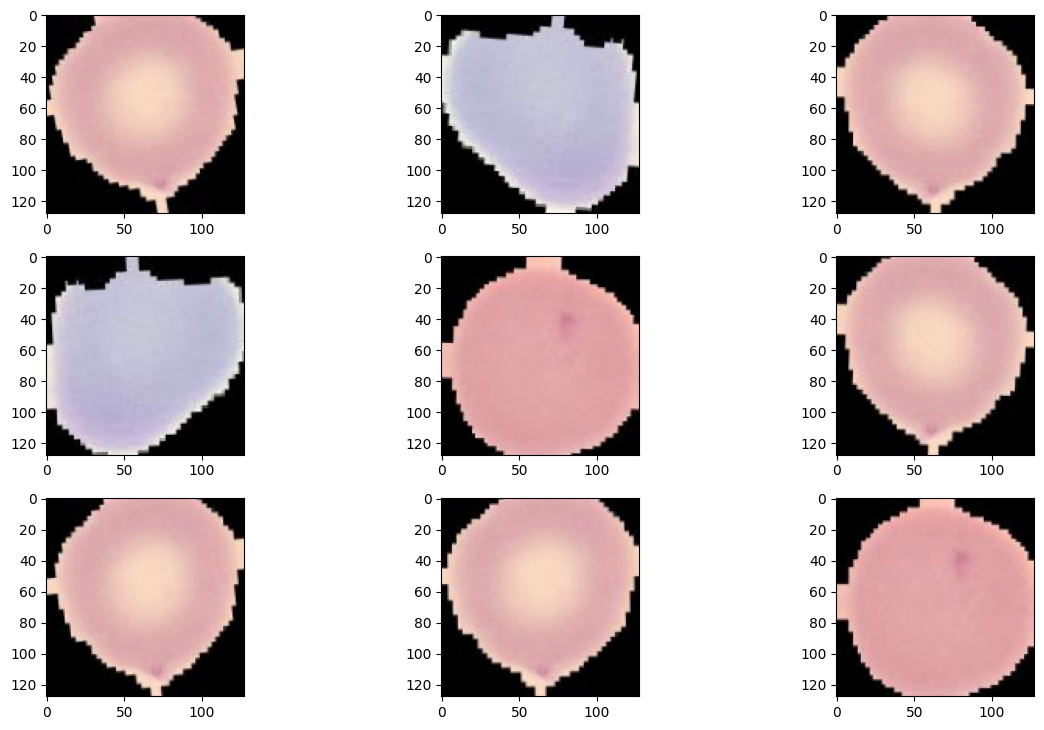

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

#Обучение модели

In [ ]:
epochs = 30
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks)

Epoch 1/30
60/60 [==============================] - 979s 16s/step - loss: 0.9081 - accuracy: 0.6277 - val_loss: 1.3366 - val_accuracy: 0.5296
Epoch 2/30
60/60 [==============================] - 946s 16s/step - loss: 0.5386 - accuracy: 0.7629 - val_loss: 2.7319 - val_accuracy: 0.5203
Epoch 3/30
60/60 [==============================] - 955s 16s/step - loss: 0.2959 - accuracy: 0.8901 - val_loss: 1.4059 - val_accuracy: 0.6112
Epoch 4/30
60/60 [==============================] - 950s 16s/step - loss: 0.2219 - accuracy: 0.9189 - val_loss: 2.7853 - val_accuracy: 0.5448
Epoch 5/30
60/60 [==============================] - 960s 16s/step - loss: 0.1913 - accuracy: 0.9314 - val_loss: 1.3617 - val_accuracy: 0.6451
Epoch 6/30
60/60 [==============================] - 956s 16s/step - loss: 0.1595 - accuracy: 0.9424 - val_loss: 0.9508 - val_accuracy: 0.7296
Epoch 7/30
60/60 [==============================] - 960s 16s/step - loss: 0.1576 - accuracy: 0.9464 - val_loss: 0.4340 - val_accuracy: 0.8235
Epoch 

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

Посмотрим на все значения, которые принимала метрика 'accuracy' во время обучения.

In [ ]:
history.history['accuracy']

[0.6276666522026062,
 0.7629380226135254,
 0.8900943398475647,
 0.9188679456710815,
 0.9314016103744507,
 0.9423854351043701,
 0.9464285969734192,
 0.9570754766464233,
 0.96064692735672,
 0.9708220958709717,
 0.9739891886711121,
 0.9765498638153076,
 0.9768193960189819,
 0.9802560806274414,
 0.981671154499054,
 0.9839622378349304]

In [ ]:
max(history.history['accuracy'])

0.9839622378349304

Посмотрим на все значения, которые принимала метрика 'val_accuracy' во время обучения.

In [ ]:
history.history['val_accuracy']

[0.5296000242233276,
 0.5202666521072388,
 0.6111999750137329,
 0.5447999835014343,
 0.6450666785240173,
 0.7296000123023987,
 0.8234666585922241,
 0.632266640663147,
 0.8138666749000549,
 0.8679999709129333,
 0.9136000275611877,
 0.8325333595275879,
 0.8053333163261414,
 0.9232000112533569,
 0.9122666716575623,
 0.9210666418075562]

In [ ]:
max(history.history['val_accuracy'])

0.9232000112533569

#Визуализация обучения

In [ ]:
import numpy as np

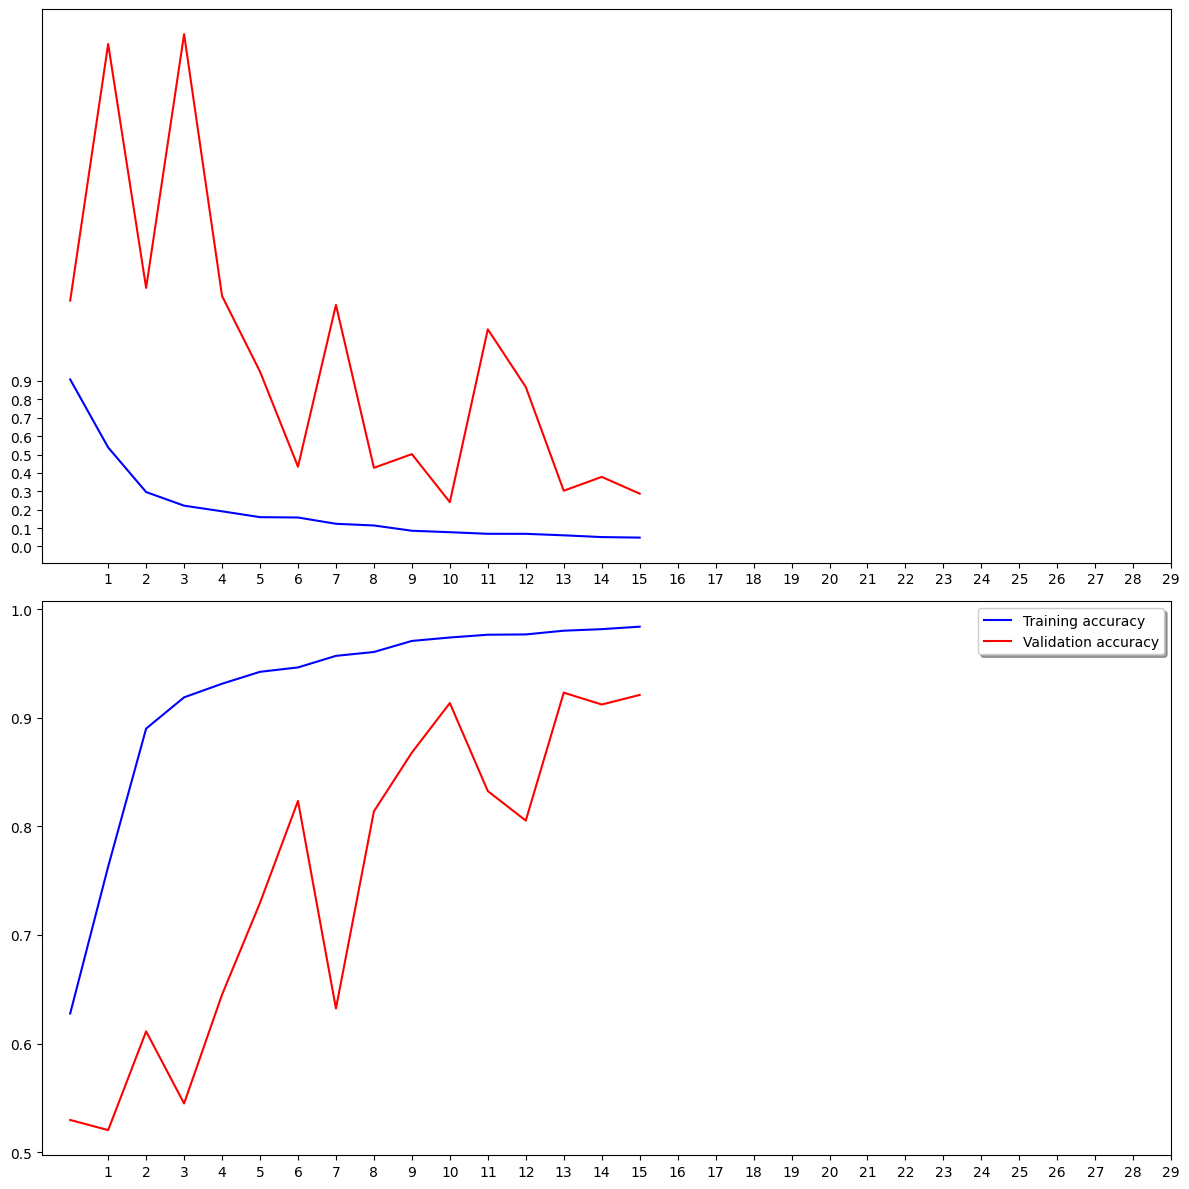

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

#Подготовка тестовых данных

In [ ]:
# загрузка файла с  Google-диска
!cp '/content/drive/MyDrive/colab_datasests/Test.zip' Test.zip

In [ ]:
# распаковка архива
!unzip Test.zip

Archive:  Test.zip
   creating: Test/
 extracting: Test/C1_thinF_IMG_20150604_104722_cell_115.png  
 extracting: Test/C1_thinF_IMG_20150604_104722_cell_123.png  
 extracting: Test/C1_thinF_IMG_20150604_104722_cell_143.png  
 extracting: Test/C1_thinF_IMG_20150604_104722_cell_15.png  
 extracting: Test/C1_thinF_IMG_20150604_104722_cell_164.png  
 extracting: Test/C1_thinF_IMG_20150604_104722_cell_191.png  
 extracting: Test/C1_thinF_IMG_20150604_104722_cell_211.png  
 extracting: Test/C1_thinF_IMG_20150604_104722_cell_216.png  
 extracting: Test/C1_thinF_IMG_20150604_104722_cell_231.png  
 extracting: Test/C1_thinF_IMG_20150604_104722_cell_242.png  
 extracting: Test/C1_thinF_IMG_20150604_104722_cell_248.png  
 extracting: Test/C1_thinF_IMG_20150604_104722_cell_60.png  
 extracting: Test/C1_thinF_IMG_20150604_104722_cell_66.png  
 extracting: Test/C1_thinF_IMG_20150604_104722_cell_73.png  
 extracting: Test/C1_thinF_IMG_20150604_104722_cell_79.png  
 extracting: Test/C1_thinF_IMG_201506

In [ ]:
!ls

archive_aug_Data.zip  drive	       sample_data  Uninfected
content		      Parasitized      Test	    Uninfected.zip
Data		      Parasitized.zip  Test.zip


In [ ]:
test_filenames = os.listdir('/content/Test')

In [ ]:
test_filenames

['C1_thinF_IMG_20150604_104919_cell_157.png',
 'C39P4thinF_original_IMG_20150622_105102_cell_93.png',
 'C1_thinF_IMG_20150604_105100_cell_186.png',
 'C2NThinF_IMG_20150604_114730_cell_161.png',
 'C2NThinF_IMG_20150604_114730_cell_172.png',
 'C2NThinF_IMG_20150604_114730_cell_178.png',
 'C39P4thinF_original_IMG_20150622_105102_cell_89.png',
 'C1_thinF_IMG_20150604_104919_cell_224.png',
 'C33P1thinF_IMG_20150619_115740a_cell_162.png',
 'C1_thinF_IMG_20150604_104722_cell_248.png',
 'C39P4thinF_original_IMG_20150622_105554_cell_14.png',
 'C1_thinF_IMG_20150604_105100_cell_152.png',
 'C39P4thinF_original_IMG_20150622_105102_cell_85.png',
 'C2NThinF_IMG_20150604_114815_cell_6.png',
 'C33P1thinF_IMG_20150619_120804a_cell_224.png',
 'C39P4thinF_original_IMG_20150622_105102_cell_81.png',
 'C2NThinF_IMG_20150604_114751_cell_181.png',
 'C2NThinF_IMG_20150604_115238_cell_13.png',
 'C3thin_original_IMG_20150608_162922_cell_12.png',
 'C39P4thinF_original_IMG_20150622_105335_cell_30.png',
 'C37BP2_th

In [ ]:
# подсчет количества файлов в директории
!find /content/Test -type f| wc -l

308


In [ ]:
test_df = pd.DataFrame({
    'filename': test_filenames
})

Количество тестовых файлов запишем в переменную 'nb_samples'.

In [ ]:
nb_samples = test_df.shape[0]

Посмотрим на первые пять строк содержимого датафрейма test_df.

In [ ]:
test_df.head()

filename
0          C1_thinF_IMG_20150604_104919_cell_157.png
1  C39P4thinF_original_IMG_20150622_105102_cell_9...
2          C1_thinF_IMG_20150604_105100_cell_186.png
3          C2NThinF_IMG_20150604_114730_cell_161.png
4          C2NThinF_IMG_20150604_114730_cell_172.png

Подготовим данные для тестирования модели с помощью ImageDataGenerator и метода flow_from_dataframe, аналогично как мы делали это для обучающей и проверочной выборок.

Но в случае тестовых данных мы не будем их трансформировать и перемешивать (shuffle=False), а только масштабируем их с помощью параметра rescale=1./255.


In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "/content/Test/",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=308,
    shuffle=False
)

Found 308 validated image filenames.


In [ ]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples//batch_size))

In [ ]:
predict.shape

(308, 2)

Посмотрим на значения предсказанных данных.

In [ ]:
predict

array([[4.26023057e-08, 9.99999940e-01],
       [9.72639084e-01, 2.73608230e-02],
       [9.99746442e-01, 2.53608625e-04],
       [5.68229837e-07, 9.99999344e-01],
       [1.13044289e-05, 9.99988616e-01],
       [1.37735473e-03, 9.98622596e-01],
       [9.99999821e-01, 1.26070304e-07],
       [1.53243218e-09, 9.99999940e-01],
       [9.99999940e-01, 1.68754372e-10],
       [6.52695326e-06, 9.99993384e-01],
       [9.99999940e-01, 4.26076507e-09],
       [7.67199822e-07, 9.99999225e-01],
       [9.99999940e-01, 3.11385051e-08],
       [2.33919332e-06, 9.99997556e-01],
       [9.99890864e-01, 1.09118941e-04],
       [9.97665584e-01, 2.33437167e-03],
       [8.21583217e-06, 9.99991715e-01],
       [5.60275595e-08, 9.99999940e-01],
       [2.47157921e-08, 9.99999940e-01],
       [6.93309680e-02, 9.30669069e-01],
       [9.99874830e-01, 1.25290695e-04],
       [6.23613074e-02, 9.37638700e-01],
       [4.57241433e-03, 9.95427549e-01],
       [4.11030641e-08, 9.99999940e-01],
       [9.351028

Применим функцию argmax библиотеки Numpy, чтобы извлечь максимальное значение вероятности, предсказанное для каждого изображения (по строкам - axis=1).

In [ ]:
test_df['category'] = np.argmax(predict, axis=1)

Конвертируем предсказанные метки в названия классов для удобной визуализации предсказаний, сделанной моделью нейронной сети.

Для этого предварительно применим метод class_indices к обучающей выборке train_generator, созданной нами ранее, который позволяет получить доступ к словарю, где приведены в соответствие имя класса и соответствующий ему индекс.

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 0: 'Parasitized', 1: 'Uninfected'})

#Визулизация предсказанных классов изображений

<Axes: >

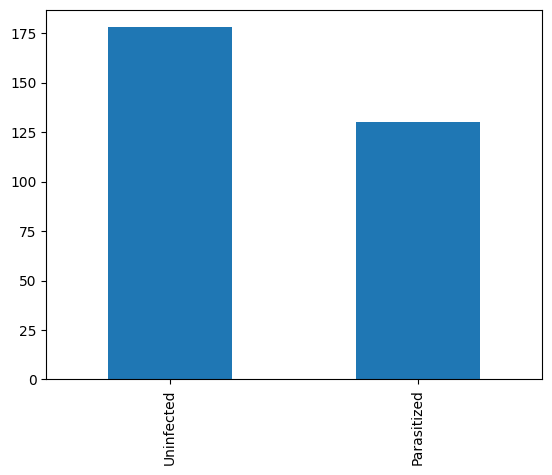

In [ ]:
test_df['category'].value_counts().plot.bar()

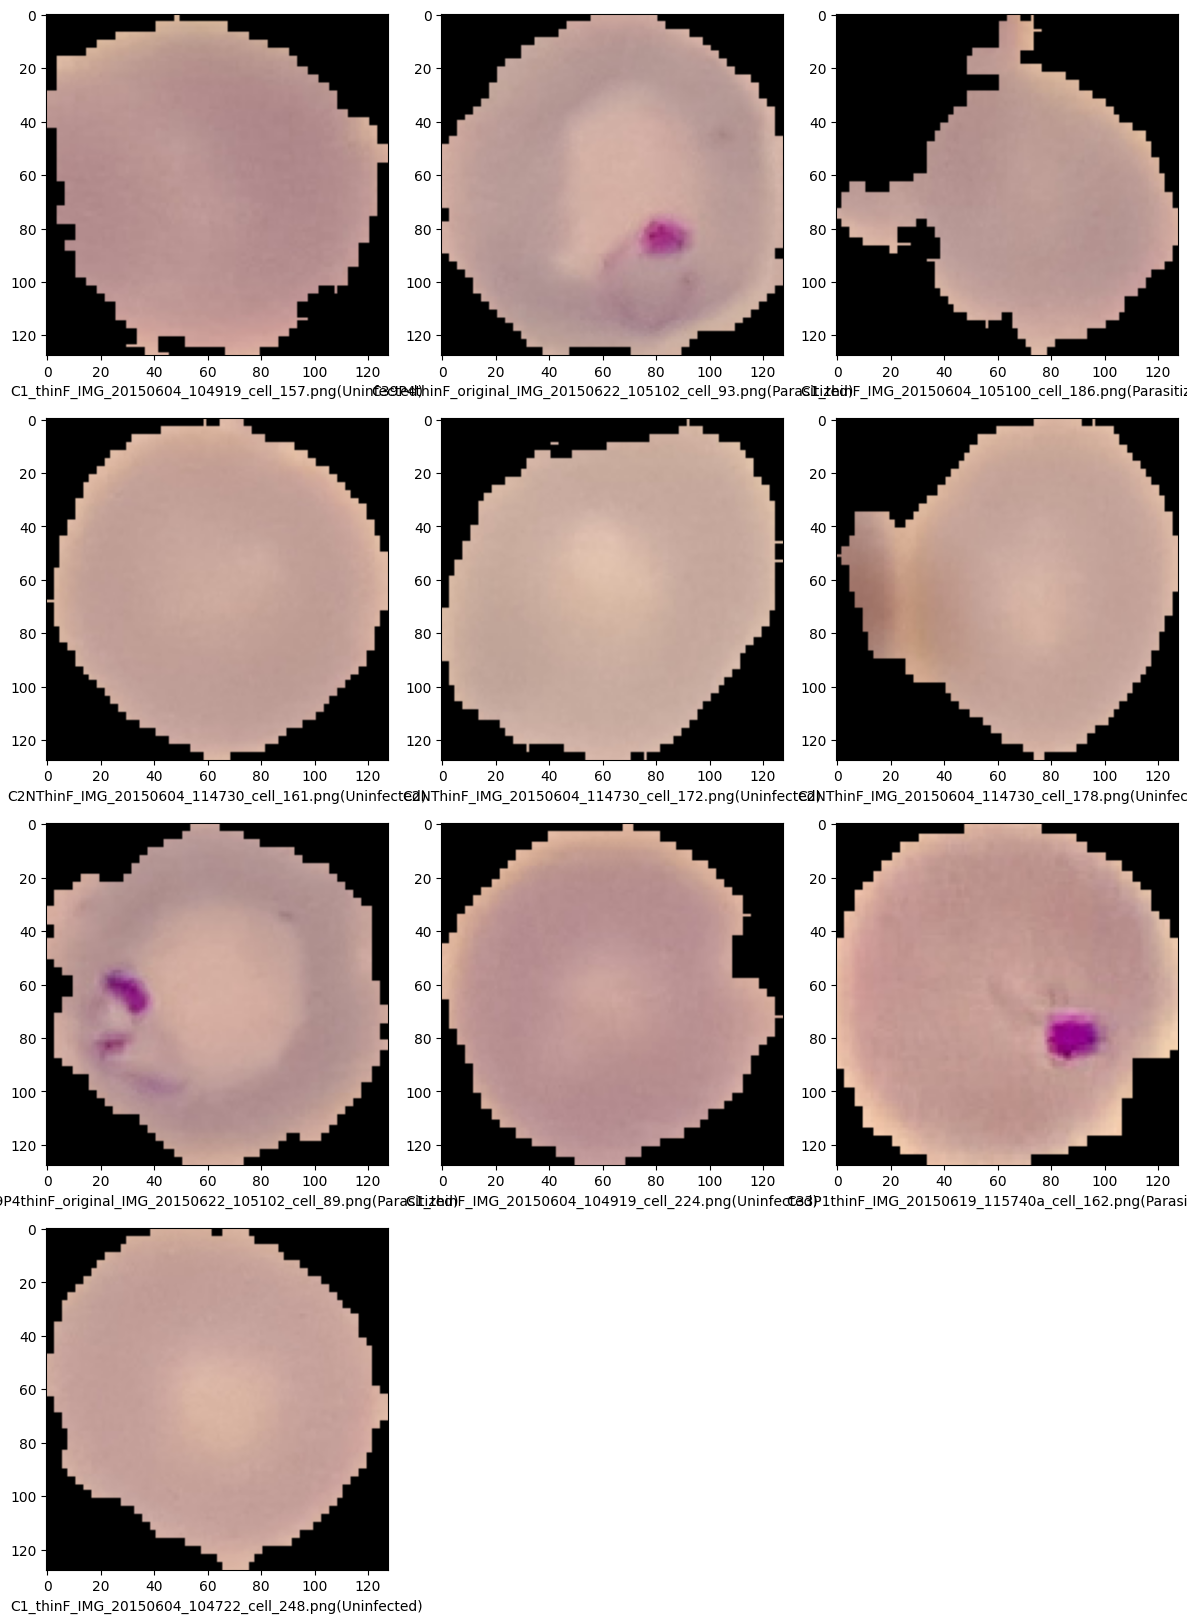

In [ ]:
sample_test = test_df.head(10)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/Test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

#Приложение 1. Расчет параметров модели.

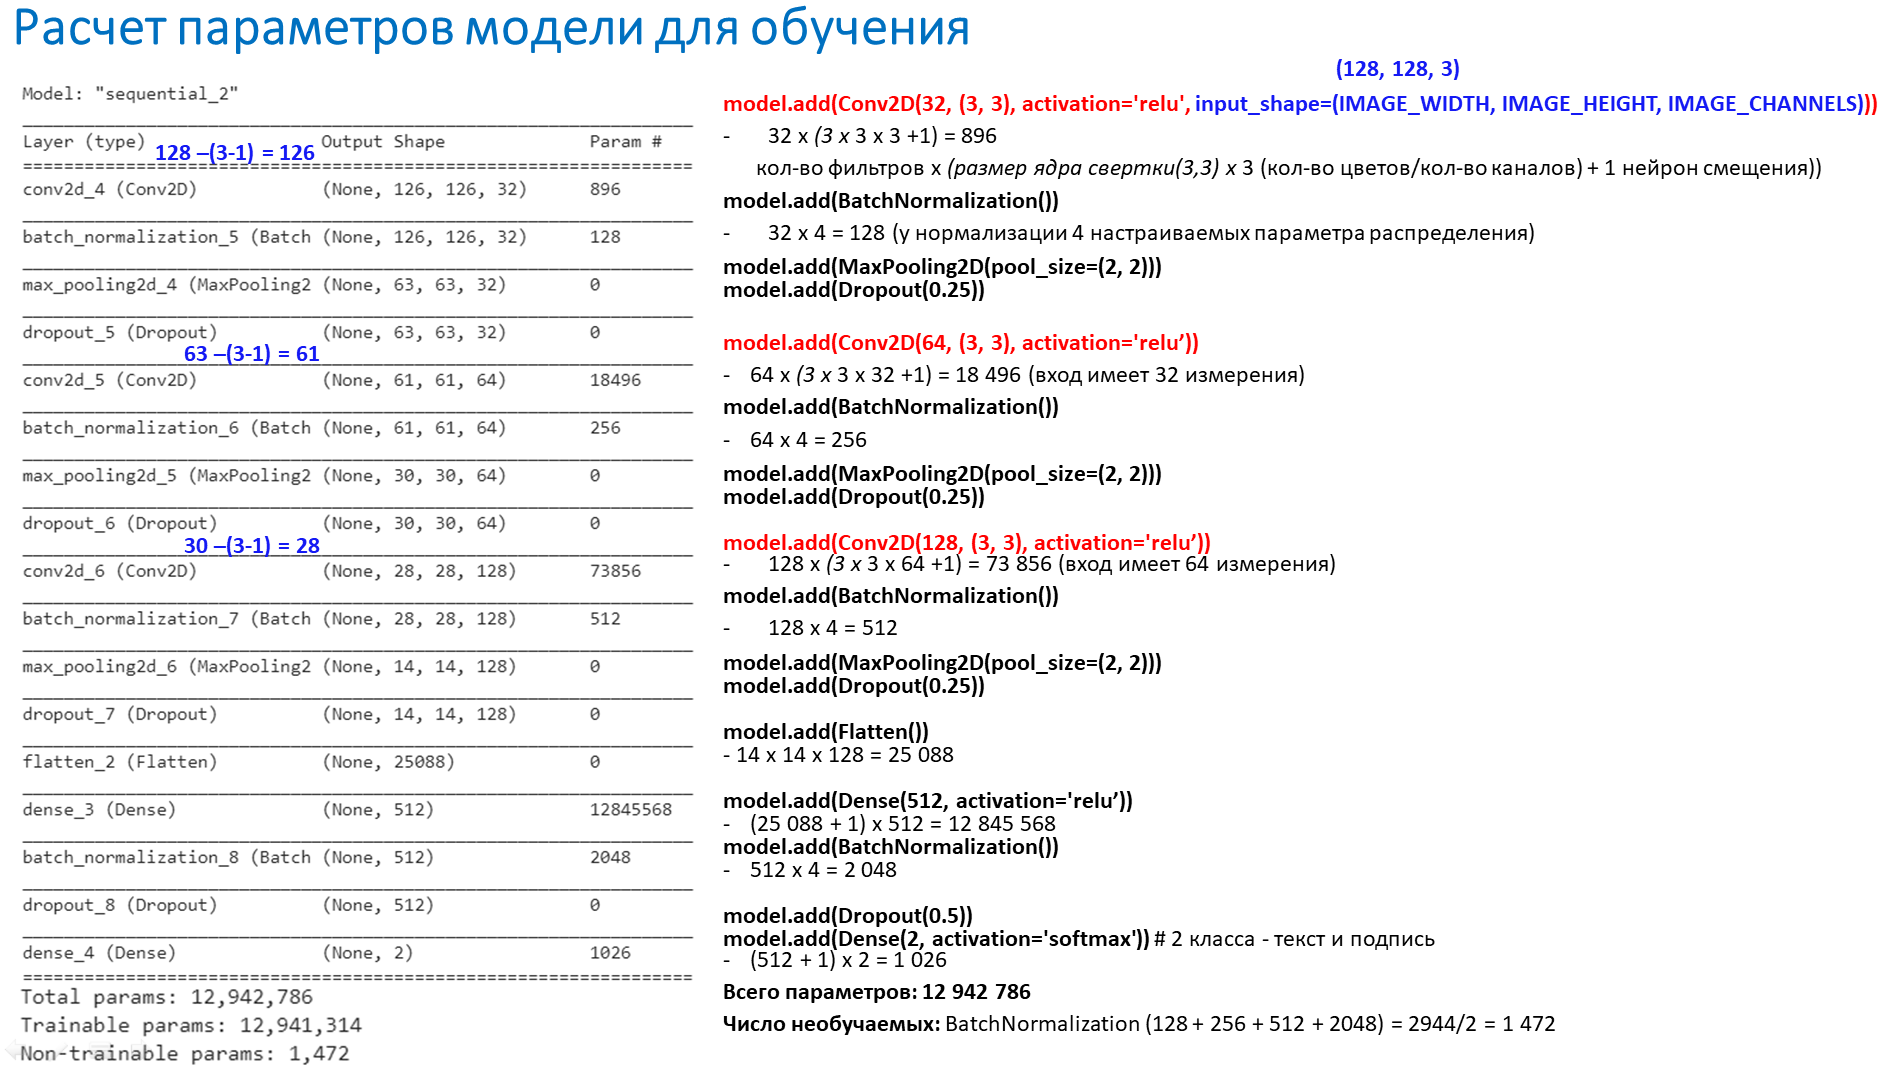